# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
#Lo primero voy a revisar si todos los jugadores estan en millones de euros... me extrañaria. 
fifa['Last_Digit_Value'] = fifa['Value'].str.strip().str[-1]

In [5]:
#Tambien y de cara a aplicar una funcion mas adelante veremos si todos estan valorados en euros. 
fifa['First_Digit'] = fifa['Value'].str.strip().str[0]

In [6]:
fifa.First_Digit.value_counts()
#Nos cargamos los leuros. :)!
#pero antes vamos a guardarnos la columna por si...
fifa["value_in_str"]=fifa['Value']
fifa["Value"] = fifa["Value"].replace({'\€':''}, regex = True)

In [7]:
fifa['Last_Digit_Value'].value_counts()

K    11108
M     6847
0      252
Name: Last_Digit_Value, dtype: int64

In [8]:
#podemos ver que hay jugadores que su valor esta en miles, y jugadores que pobrecillos no valen nada.

In [9]:
#creamos una columna para ahora rellenarla :)
fifa["value_in_str"]=fifa['Value']

In [11]:
#En mongo project utilice este codigo:
multipliers = {'K':1000, 'M':1000000, 'B':1000000000}
count=0
for i in fifa.Value:
    if i[-1].isdigit(): # check if no suffix
        fifa["Value"].iloc[count] = int(i)
        count+=1
    else:
        mult = multipliers[i[-1]] # look up suffix to get multiplier
        fifa["Value"].iloc[count] = int(float(i[:-1]) * mult)
        count+=1


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
fifa.rename(columns={'Value':'ValueNumeric',"Preferred_Foot":"Preferred_foot"},inplace=True)

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [13]:
# Your code here:
fifa["foot_int"]=0
count=-1
for i in fifa["Preferred Foot"]:
    if i=="Right":
        count+=1
        fifa["foot_int"].iloc[count] = 1
    else:
        count+=1
        fifa["foot_int"].iloc[count] = 0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
fifa.head()
#fifa["ValueNumeric"]=fifa.astype("float")
fifa['ValueNumeric'] = fifa['ValueNumeric'].astype(float)

In [68]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm

moore_lm = ols('ValueNumeric ~ C(Position)*C(Preferred_foot)',data=fifa).fit()
table = sm.stats.anova_lm(moore_lm, typ=2)
display(table)

,sum_sq,df,F,PR(>F)
C(Position),1.660532e+16,26.0,20.882988,1.763151e-96
C(Preferred_foot),2.310403e+14,1.0,7.554510,5.992017e-03
C(Position):C(Preferred_foot),5.180303e+15,26.0,6.514790,7.339844e-23
Residual,5.463363e+17,17864.0,NaN,NaN


In [ ]:
# Your conclusions here:
#Null hipotesis es que las variables no se predicen verdad? 
#Por lo tanto si PR(>F) < 0.05 rechazamos null. PR(>F)=0.00 < 0.05, rechazamos null por lo que decimos que puede ser que si
#estan relaccionadas

In [75]:
moore_lm = ols("ValueNumeric ~ C(Position)*C(Preferred_foot)*C(Overall)",data=fifa).fit()
table = sm.stats.anova_lm(moore_lm, typ=2)
display(table)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 26, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1848: RuntimeWarning: invalid value encountered in true_divide
  F /= J
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1, but rank is 0
  warnings.warn('covariance of constraints does not have full '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/base/model.py:1830: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 47, but rank is 2
  warnings.warn('covariance of 

,sum_sq,df,F,PR(>F)
C(Position),NaN,26.0,NaN,NaN
C(Preferred_foot),NaN,1.0,NaN,NaN
C(Overall),-3.933805e+16,47.0,-621.829912,1.000000
C(Position):C(Preferred_foot),NaN,26.0,NaN,NaN
C(Position):C(Overall),1.627983e+17,1222.0,98.977198,0.000000
C(Preferred_foot):C(Overall),2.379881e+13,47.0,0.376196,0.539655
C(Position):C(Preferred_foot):C(Overall),8.198644e+16,1222.0,49.845671,0.000000
Residual,2.220622e+16,16498.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# Your conclusions here:



After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [77]:
# Your code here:
anova_nationality = ols('ValueNumeric ~ Nationality',data=fifa).fit()
table_nationality = sm.stats.anova_lm(anova_nationality)
display(table_nationality)

,df,sum_sq,mean_sq,F,PR(>F)
Nationality,162.0,3.282900e+16,2.026481e+14,6.719634,5.651114e-132
Residual,17755.0,5.354484e+17,3.015761e+13,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
# Your conclusions here:
#Null hipotesis es que las variables no se predicen verdad? 
#Por lo tanto si PR(>F) < 0.05 rechazamos null. PR(>F)=0.00 < 0.05, rechazamos null por lo que decimos que puede ser que si
#estan relaccionadas

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [50]:
# Your code here:
#fifa.isnull().sum().value_counts()
fifa.isna().sum()

Name                  0
Age                   0
Nationality           0
Overall               0
Potential             0
Club                241
ValueNumeric          0
Preferred_foot       48
Position             60
Weak Foot            48
Acceleration         48
SprintSpeed          48
Stamina              48
Strength             48
LongShots            48
Aggression           48
Interceptions        48
Positioning          48
Vision               48
Penalties            48
Last_Digit_Value      0
First_Digit           0
value_in_str          0
foot_int              0
dtype: int64

In [53]:
def drop_null(table,subset):
    table.dropna(subset=[f"{subset}"],inplace=True)
#mitica funcion :)!

In [63]:
for i in list(fifa.columns):
    drop_null(fifa,i)

In [64]:
fifa.isna().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club                0
ValueNumeric        0
Preferred_foot      0
Position            0
Weak Foot           0
Acceleration        0
SprintSpeed         0
Stamina             0
Strength            0
LongShots           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
Last_Digit_Value    0
First_Digit         0
value_in_str        0
foot_int            0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [98]:
fifa.corr()
#guay, todo viene porque he intentado buscar cual era la variable que mas explicaba el precio. 


,Age,Overall,Potential,ValueNumeric,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,foot_int
Age,1.000000,0.453252,-0.252799,0.077274,0.060193,-0.158441,-0.150996,0.099725,0.334980,0.156305,0.267105,0.199092,0.084534,0.189320,0.140348,0.002914
Overall,0.453252,1.000000,0.660850,0.631395,0.211741,0.197856,0.211919,0.367111,0.351064,0.422182,0.396719,0.322788,0.358130,0.501137,0.342354,-0.043954
Potential,-0.252799,0.660850,1.000000,0.579482,0.161411,0.235875,0.237933,0.202373,0.075014,0.266765,0.170385,0.155150,0.245681,0.348128,0.224547,-0.038404
ValueNumeric,0.077274,0.631395,0.579482,1.000000,0.166652,0.172103,0.174047,0.212806,0.129594,0.281630,0.186003,0.141977,0.260733,0.359716,0.241243,-0.016539
Weak Foot,0.060193,0.211741,0.161411,0.166652,1.000000,0.259768,0.247467,0.231145,-0.009027,0.354566,0.130735,0.052928,0.345879,0.337568,0.328664,0.072578
Acceleration,-0.158441,0.197856,0.235875,0.172103,0.259768,1.000000,0.921814,0.606839,-0.167522,0.579617,0.250225,0.151594,0.681759,0.461150,0.532641,-0.118011
SprintSpeed,-0.150996,0.211919,0.237933,0.174047,0.247467,0.921814,1.000000,0.619422,-0.084212,0.560929,0.278254,0.163165,0.664762,0.429139,0.520800,-0.116849
Stamina,0.099725,0.367111,0.202373,0.212806,0.231145,0.606839,0.619422,1.000000,0.263863,0.596221,0.646075,0.576375,0.640987,0.472008,0.515637,-0.092213
Strength,0.334980,0.351064,0.075014,0.129594,-0.009027,-0.167522,-0.084212,0.263863,1.000000,0.050438,0.473778,0.357007,0.007822,-0.047170,0.054316,0.039108
LongShots,0.156305,0.422182,0.266765,0.281630,0.354566,0.579617,0.560929,0.596221,0.050438,1.000000,0.393946,0.194497,0.861165,0.753223,0.812658,-0.079201


In [81]:
import statsmodels.api as sm
X = sm.add_constant(fifa['Stamina'])
Y = fifa.ValueNumeric
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          1.42e-182
Time:                        20:23:23   Log-Likelihood:            -3.0353e+05
No. Observations:               17918   AIC:                         6.071e+05
Df Residuals:                   17916   BIC:                         6.071e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.318e+06   1.69e+05    -13.748      0.000   -2.65e+06   -1.99e+06
Stamina     7.541e+04   2586.786     29.152      0.000    7.03e+04    8.05e+04
==============================================================================
Omnibus:                    22862.905   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4668449.179
Skew:                           7.053   Prob(JB):                         0.00
Kurtosis:                      80.808   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
#Null hipotesis es que las variables no se predicen verdad? 
#Por lo tanto si p < 0.05 rechazamos null. p=0.00 < 0.05, rechazamos null por lo que decimos que puede ser que si
#estan relaccionadas

#valeee
#p es inferior a 0.05 por lo tanto el modelo es bueno, la correlacion es 0.48 no es muy fuerte... creo que es a paritr de 0.75.



Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [73]:
# Your code here:
X = sm.add_constant(fifa[['Potential']])
Y = fifa.ValueNumeric

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     9058.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:01:39   Log-Likelihood:            -3.0027e+05
No. Observations:               17918   AIC:                         6.006e+05
Df Residuals:                   17916   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.544e+07      4e+05    -88.693      0.000   -3.62e+07   -3.47e+07
Potential   5.312e+05   5581.083     95.172      0.000     5.2e+05    5.42e+05
==============================================================================
Omnibus:                    23030.426   Durbin-Watson:                   0.550
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6340772.996
Skew:                           7.013   Prob(JB):                         0.00
Kurtosis:                      94.084   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
#Null hipotesis es que las variables no se predicen verdad? 
#Por lo tanto si p < 0.05 rechazamos null. p=0.00 < 0.05, rechazamos null por lo que decimos que puede ser que si
#estan relaccionadas.

#valeee
#p es inferior a 0.05 por lo tanto el modelo es bueno, la correlacion es 0.33 no es muy fuerte... creo que es a paritr de 0.75.


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

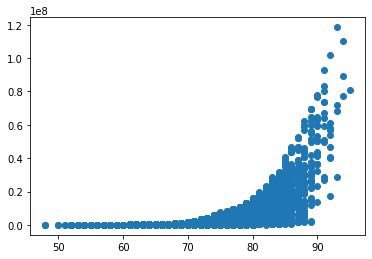

In [79]:
# Your code here:
%matplotlib inline
x=fifa['Potential']
y=fifa['ValueNumeric']
from matplotlib import pyplot as plt
plt.scatter(x,y)
#:) vamos a por una katita!